In [ ]:
!pip install google-api-python-client
from googleapiclient.discovery import build
import pandas as pd

import traceback
import os
import datetime
# from urllib.parse import parse_qs, urlparse
import requests
import json
import numpy as np
import unicodedata
import matplotlib.pyplot as plt



In [ ]:
def dataframe_videos(UploadId):
  
  youTubeApiKey= #key
  youtube=build('youtube','v3',developerKey=youTubeApiKey)
  allVideos = []
  nextPage_token = None
  res = youtube.playlistItems().list(playlistId = UploadId,maxResults = 100,
                                     part = 'snippet',pageToken = nextPage_token).execute()

  
  while 1:
    res = youtube.playlistItems().list(playlistId = UploadId,maxResults = 100,part = 'snippet',pageToken = nextPage_token).execute()

    allVideos += res['items']

    nextPage_token = res.get('nextPageToken')

    if nextPage_token is  None:
      break
  
  video_ids = list(map(lambda x:x['snippet']['resourceId']['videoId'], allVideos))

  stats = []
  for i in range(0, len(video_ids), 40):
    res = (youtube).videos().list(id=','.join(video_ids[i:i+40]),part='statistics').execute()
    stats += res['items']
  


  title=[ ]
  liked=[ ]
  disliked=[ ]
  views=[ ]
  url=[ ]
  comment=[ ]
  videoid = []
  publishedDate = []
  video_description = []

  for i in range(0,len(stats)-2):
    # print(i)
    i += 1
    title.append((allVideos[i])['snippet']['title'])
    publishedDate.append((allVideos[i])['snippet']['publishedAt'])
    video_description.append((allVideos[i])['snippet']['description'])
    liked.append(int((stats[i])['statistics']['likeCount']))
    disliked.append(int((stats[i])['statistics']['dislikeCount']))
    views.append(int((stats[i])['statistics']['viewCount']))
    comment.append(int((stats[0])['statistics']['commentCount']))
    videoid.append(allVideos[i]['snippet']['resourceId']['videoId'])

  data={'title':title,'videoIDS':videoid,'video_description':video_description,'publishedDate':publishedDate,
      'likes':liked,'dislikes':disliked,'views':views,'comment':comment}
  
  return pd.DataFrame(data)

def strip_accents(s):
   return ''.join(c for c in unicodedata.normalize('NFD', s)
                  if unicodedata.category(c) != 'Mn')

def clean_df(df):

  df["title"]= df["title"].astype(str)
  #df[["artist","song","otro"]] = df["title"].str.split("-", expand=True)
  df[["artist","song"]] = df["title"].str.split("-", expand=True)
  
  #print("aqui")
  #df.drop(columns=["title","comment","otro"], axis=1,inplace=True)
  df.drop(columns=["title","comment"], axis=1,inplace=True)
  
  df[["artista","otro"]] = df["artist"].str.split("(", expand=True)
  df[["cancion","otros"]] = df["song"].str.split("(", expand=True)
  df[["otros2","otros3"]] = df["song"].str.split("[",expand=True)
  df.drop(columns=["artist","otro","otros","song","otros2","otros3"], axis=1,inplace=True)
  cols= df.columns.to_list()
  cols = cols[-2:] + cols[:-2]
  df = df[cols]

  cols = df.select_dtypes(include=[np.object]).columns
  df[cols] = df[cols].apply(lambda x: x.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8'))
  df= df.applymap(lambda s:s.lower() if type(s) == str else s)
  df.drop("video_description", axis=1,inplace=True)               

  df["date"] = df["publishedDate"].str[:10]
  df.drop("publishedDate", axis=1,inplace=True)
  df["date"] = pd.to_datetime(df["date"])

  df["liked"]= (df["likes"])/(df["likes"]+df["dislikes"])
  df["reactions"] = df["likes"]+df["dislikes"]

  return df


def top_artistas(df,no_artistas=5):
  df.artista.value_counts().sort_values(ascending=False)[:no_artistas].plot(kind = 'bar')
  plt.ylabel("No. canciones") 

In [ ]:
playlist = "RD0PXOFyVZQRk"
df1=dataframe_videos(playlist)
df1.head()

,title,videoIDS,video_description,publishedDate,likes,dislikes,views,comment
0,Masuark - Por ti (Letra),78MQkQj1cjc,Masuark\nhttps://youtu.be/DulRGHuf6JA\nhttps:/...,2020-05-11T23:13:12Z,1317,18,16681,88
1,Emvic - Quiero ser yo (Letra),FuNvTwvmvNk,Emvic\nhttps://instagram.com/_emvic_?igshid=ni...,2020-07-05T19:30:23Z,1190,9,13181,88
2,Candlees - Y a lo mejor (Letra),qijleX_3FCc,Candlees\nhttps://instagram.com/_candlees?igsh...,2020-05-10T01:13:53Z,1457,9,20491,88
3,Cyluz - Niña (Letra),BBbX2AS4JlE,Cyluz\nhttps://www.instagram.com/cyluz.pe/?hl=...,2020-05-06T00:50:17Z,1340,15,15517,88
4,Andrés Zavala - Lo que siento (Letra),Wsb7GAHwcV0,,2020-02-22T04:49:26Z,19489,102,380166,88


In [ ]:
df2=clean_df(df1)
df2.head()

,artista,cancion,videoIDS,likes,dislikes,views,date,liked,reactions
0,masuark,por ti,78mqkqj1cjc,1317,18,16681,2020-05-11,0.986517,1335
1,emvic,quiero ser yo,funvtwvmvnk,1190,9,13181,2020-07-05,0.992494,1199
2,candlees,y a lo mejor,qijlex_3fcc,1457,9,20491,2020-05-10,0.993861,1466
3,cyluz,nina,bbbx2as4jle,1340,15,15517,2020-05-06,0.988930,1355
4,andres zavala,lo que siento,wsb7gahwcv0,19489,102,380166,2020-02-22,0.994794,19591


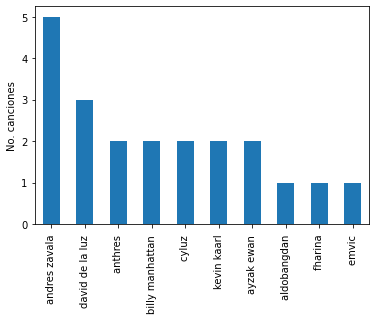

In [ ]:
top_artistas(df2,10)

In [ ]:
df2.loc[df2.liked == df2.liked.max()]

,artista,cancion,videoIDS,likes,dislikes,views,date,liked,reactions
25,billy manhattan,fingir que nos queremos,-bvifo3cfva,1478,4,21743,2020-04-11,0.997301,1482


In [ ]:
df= dataframe_videos("PLNeEokHpTtxEg0wkC4dO5mTJNuQL2wY7Y")
df.head()

,title,videoIDS,video_description,publishedDate,likes,dislikes,views,comment
0,"Fall Out Boy - Dance, Dance (Closed Captioned,...",C6MOKXm8x50,"Music video by Fall Out Boy performing Dance, ...",2018-10-14T17:38:03Z,717275,22363,129203134,3182
1,Muse - Undisclosed Desires,R8OOWcsFj0U,"Watch the music video for ""Undisclosed Desires...",2018-10-14T17:38:13Z,403566,9286,96656628,3182
2,In The End (Official HD Video) - Linkin Park,eVTXPUF4Oz4,Hybrid Theory 20th Anniversary Edition availab...,2018-10-14T17:38:23Z,7110591,176596,1108041441,3182
3,B.o.B - Airplanes (feat. Hayley Williams of Pa...,kn6-c223DUU,"The official video for ""Airplanes"" by B.o.B fe...",2018-10-14T17:38:32Z,2864040,74045,564299296,3182
4,Paramore: Decode [OFFICIAL VIDEO],RvnkAtWcKYg,Paramore's music video for 'Decode' from the s...,2018-10-14T17:38:38Z,1549902,35758,337929768,3182


In [ ]:

df = df_clean

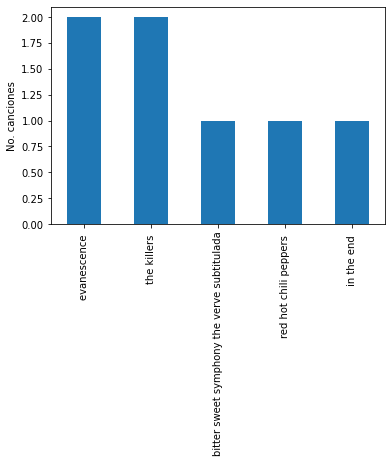

In [ ]:
top_artistas(df)

In [ ]:
df.loc[df.views == df.views.max()]

,artista,cancion,videoIDS,likes,dislikes,views,date,liked,reactions
2,in the end,linkin park,evtxpuf4oz4,7110591,176596,1108041441,2018-10-14,0.975766,7287187
